# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import joblib


# **2. Memuat Dataset dari Hasil Clustering**
Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
# Gunakan dataset hasil clustering yang memiliki fitur Target
# Silakan gunakan dataset data_clustering jika tidak menerapkan Interpretasi Hasil Clustering [Advanced]
# Silakan gunakan dataset data_clustering_inverse jika menerapkan Interpretasi Hasil Clustering [Advanced]
# Lengkapi kode berikut
df = pd.read_csv("data_clustering_inverse.csv")

In [3]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,TransactionAmount_bin,AccountBalance_bin,Target,Target_PCA
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08,0,2,3,3.0
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35,3,3,3,3.0
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04,1,0,2,1.0
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06,1,3,3,3.0
4,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 8:06:36,1,0,3,3.0


# **3. Data Splitting**
Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [5]:
# Menggunakan train_test_split() untuk melakukan pembagian dataset.
X = df.drop(columns=["Target"])
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# **4. Membangun Model Klasifikasi**
Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Menggunakan algoritma klasifikasi yaitu Decision Tree.
2. Latih model menggunakan data yang sudah dipisah.

In [8]:
# Buatlah model klasifikasi menggunakan Decision Tree
date_cols = [col for col in ["TransactionDate", "PreviousTransactionDate"] if col in df.columns]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors="coerce")
    df[col] = df[col].map(lambda x: x.timestamp() if pd.notna(x) else np.nan)

categorical_cols = df.select_dtypes(include=["object", "category"]).columns.drop("Target", errors="ignore")
encoders = {}
for col in categorical_cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col].astype(str))
    encoders[col] = encoder

numeric_cols = df.select_dtypes(include=[np.number]).columns.drop("Target", errors="ignore")
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

X = df.drop(columns=["Target"])
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [9]:
# Menyimpan Model

joblib.dump(model, 'decision_tree_model.h5')

['decision_tree_model.h5']

# **5. Memenuhi Kriteria Skilled dan Advanced dalam Membangun Model Klasifikasi**



**Biarkan kosong jika tidak menerapkan kriteria skilled atau advanced**

In [11]:
# Melatih model menggunakan algoritma klasifikasi scikit-learn selain Decision Tree.
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)
{"train_accuracy": accuracy_score(y_train, logreg.predict(X_train)),
 "test_accuracy": accuracy_score(y_test, y_pred_logreg)}

{'train_accuracy': 0.9681620839363242, 'test_accuracy': 0.9739884393063584}

,model,accuracy,precision,recall,f1_score
0,DecisionTree,0.997110,0.997142,0.997110,0.997109
1,LogisticRegression,0.973988,0.974425,0.973988,0.974003


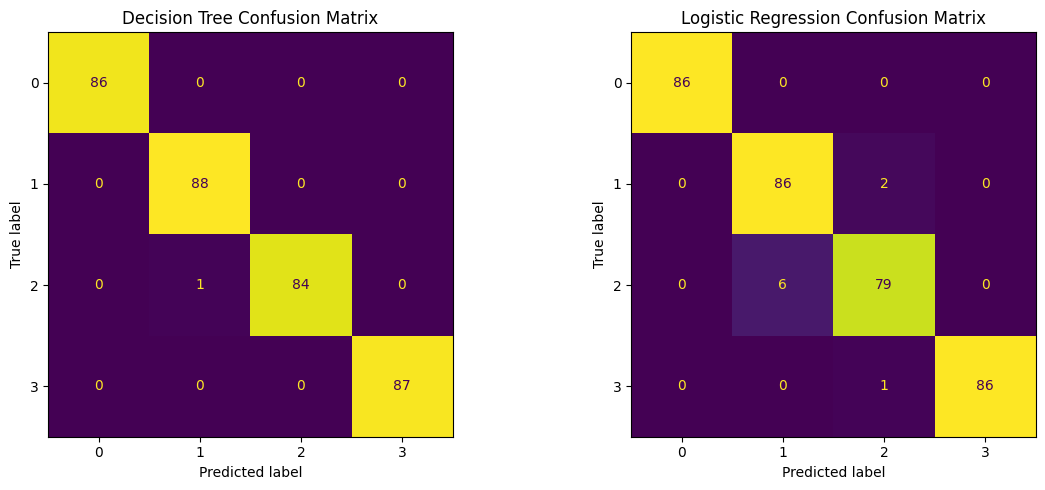

In [19]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada seluruh algoritma yang sudah dibuat.
metrics_df = pd.concat([dt_metrics, logreg_metrics], ignore_index=True)
display(metrics_df)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree, ax=axes[0], colorbar=False)
axes[0].set_title("Decision Tree Confusion Matrix")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_logreg, ax=axes[1], colorbar=False)
axes[1].set_title("Logistic Regression Confusion Matrix")
plt.tight_layout()

In [ ]:
# Menyimpan Model Selain Decision Tree
# Model ini bisa lebih dari satu
joblib.dump(logreg, 'explore_logistic_regression_classification.h5')

['explore_logistic_regression_classification.h5']

Hyperparameter Tuning Model

Pilih salah satu algoritma yang ingin Anda tuning

In [22]:
# Lakukan Hyperparameter Tuning dan Latih ulang.
# Lakukan dalam satu cell ini saja.
param_grid = {
    "max_depth": [None, 5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"],
}
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    scoring="f1_weighted",
    cv=5,
    n_jobs=-1,
)
grid_search.fit(X_train, y_train)

best_dt = grid_search.best_estimator_
best_dt.fit(X_train, y_train)
y_pred_dt_tuned = best_dt.predict(X_test)

pd.DataFrame(
    [
        {
            "model": "DecisionTree_Tuned",
            "accuracy": accuracy_score(y_test, y_pred_dt_tuned),
            "precision": precision_score(y_test, y_pred_dt_tuned, average="weighted", zero_division=0),
            "recall": recall_score(y_test, y_pred_dt_tuned, average="weighted", zero_division=0),
            "f1_score": f1_score(y_test, y_pred_dt_tuned, average="weighted", zero_division=0),
            "best_params": grid_search.best_params_,
        }
    ]
)

,model,accuracy,precision,recall,f1_score,best_params
0,DecisionTree_Tuned,0.99711,0.997142,0.99711,0.997109,"{'criterion': 'gini', 'max_depth': None, 'min_..."


,model,accuracy,precision,recall,f1_score,best_params
0,DecisionTree_Tuned,0.99711,0.997142,0.99711,0.997109,"{'criterion': 'gini', 'max_depth': None, 'min_..."


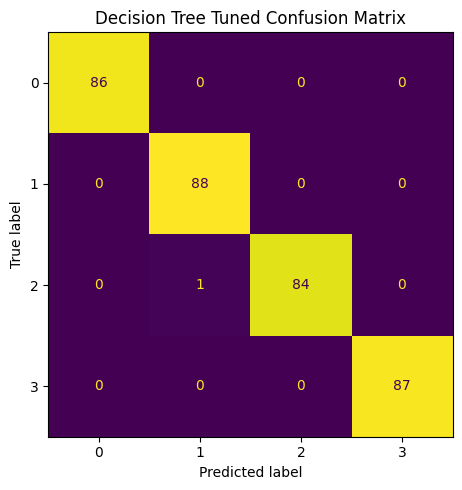

In [23]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada algoritma yang sudah dituning.
tuned_metrics = pd.DataFrame(
    [
        {
            "model": "DecisionTree_Tuned",
            "accuracy": accuracy_score(y_test, y_pred_dt_tuned),
            "precision": precision_score(y_test, y_pred_dt_tuned, average="weighted", zero_division=0),
            "recall": recall_score(y_test, y_pred_dt_tuned, average="weighted", zero_division=0),
            "f1_score": f1_score(y_test, y_pred_dt_tuned, average="weighted", zero_division=0),
            "best_params": grid_search.best_params_,
        }
    ]
)
display(tuned_metrics)

fig, ax = plt.subplots(figsize=(6, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt_tuned, ax=ax, colorbar=False)
ax.set_title("Decision Tree Tuned Confusion Matrix")
plt.tight_layout()

In [24]:
# Menyimpan Model hasil tuning
joblib.dump(best_dt, "tuning_classification.h5")

['tuning_classification.h5']

End of Code